# Support Vector Machines

## 1. Linearly separable case

## Example 1. "Toy" example with a streighforward solution

In [67]:
import numpy as np
from numpy import linalg
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

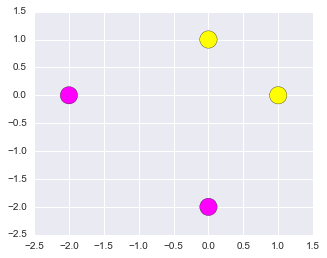

In [68]:
#Generate and visualize the toy data
X=np.array([[1,0],[0,1],[-2,0],[0,-2]])
Y=np.array([1]*2+[-1]*2)
plt.scatter(X[:, 0].T, X[:, 1].T, c=Y, s=300, cmap='spring')

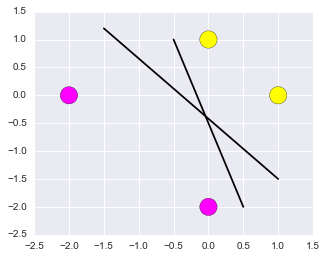

In [69]:
# Question: How to find the a hyperplane(a line) to separate the data? We could have multiple choices, but which one is the best?
plt.scatter(X[:, 0], X[:, 1], c=Y, s=300, cmap='spring')
plt.plot([-1.5,1], [1.2,-1.5], 'k-');
plt.plot([0.5,-.5],[-2,1], 'k-');

(1) We need to find the hyperplane: $w_1 x_1+w_2 x_2+b=0$ 

such that:
$$\begin{cases} \underset{w=(w_1,w_2),b,\Vert w \Vert=1}{\text{max}} M \\
y_i(x_{i}^{T}w + b)\ge M, \ i =1,2,3,...N
\end{cases}$$

We divide both sides of the second equation by M (M>0), and let new $w_{new}=\frac{w}{M}$(so,$M=\frac{1}{\Vert w_{new} \Vert}$) we can get this equivalent condition for calculation convinence:
$$\begin{cases} \underset{w,b}{\text{min}} \Vert w \Vert^2 \\
y_i(x_{i}^{T}w + b)\ge1
\end{cases}$$

Now let's solve those conditions by hand for our partucular case, with respect to $X=\left[(1,0),(0,1),(-2,0),(0,-2)\right]$ and $Y=(1,1,-1,-1)$:

$$\begin{cases} \underset{w,b}{\text{min}} (w_1^2+w_2^2)\\
w_1+b\ge1\hspace{3ex}(E1.1)\\
w_2+b\ge1\hspace{3ex}(E1.2)\\
(-1)*(-2w_1+b)\ge1\hspace{3ex}(E1.3)\\
(-1)*(-2w_2+b)\ge1\hspace{3ex}(E1.4)
\end{cases}$$

(E1.1)+(E1.3)$\Rightarrow$
$3 w_1\ge2$

(E1.2)+(E1.4)$\Rightarrow$
$3 w_2\ge2$

(E1.1),(E1.3)$\Rightarrow$
$2 w_1-1\ge b \ge 1-w_1$

(E1.2),(E1.3)$\Rightarrow$
$2 w_2-1\ge b \ge 1-w_2$

Obviousely $(w_1^2+w_2^2)$ reaches the minimum under above conditions for the minimal possible $w_1=w_2=2/3$. Then $b=1/3$. Those values satisy (E1.1)-(E1.4) and provide the unique (up to a constant factor) definition for the separating line as $2 x_1+2 x_2+1=0$. 

Then the corresponding maximal value of the margin is $M=\frac{1}{||w||}=\frac{1}{\sqrt{8/9}}=\frac{3\sqrt{2}}{4}$.

Let's see the plot:

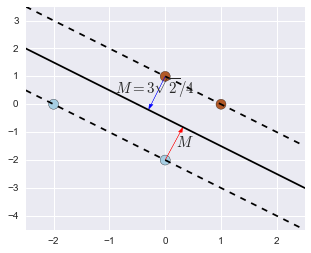

In [70]:
#Now let's plot the graph

x1 = np.linspace(-2.5, 2.5)
x2 = -x1-0.5 # this is the separating hyperplane we found
M=3*np.sqrt(2)/4 #this is the M 

# plot the parallels to the separating hyperplane that pass through the

x2_down = -x1-0.5+1.5 #1.5=M||w||=\sqrt{2}M


x2_up = -x1-0.5-1.5

# plot the line, the points, and the nearest vectors to the plane
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.axis('tight')
plt.show
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=100)
plt.arrow(0, 1, -0.25, -1, fc="b", ec="b", head_width=0.07, head_length=0.2)
plt.annotate(r"$M=3\sqrt{2}/4$", xy=(-0.9, 0.4), fontsize=15)
plt.arrow(0, -2, 0.27, 1, fc="r", ec="r", head_width=0.07, head_length=0.2);
plt.annotate(r"$M$", xy=(0.2, -1.5), fontsize=15)

In [71]:
# So in this case all the points(vectors) touch the margin and happen to be the support vectors.

### SVM Package.

http://scikit-learn.org/stable/modules/svm.html#


http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

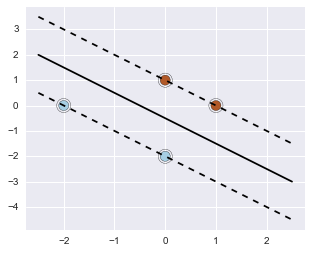

In [72]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear',C=10**100)  # as we use linear svm we specify a linear kernel (see below what does it mean)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
########################################################################
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that go through the
# support vectors
b = clf.support_vectors_[0]

x2_down = a * x1 + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=100)

plt.axis('tight')
plt.show()

## 2. Soft Margin

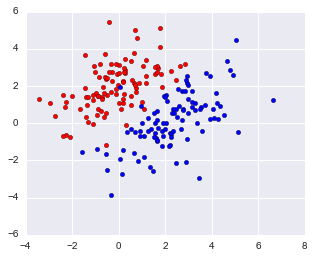

In [73]:
# Genearte data that are not fully seperatable this time.
np.random.seed(999)
mean1 = np.array([0, 2])
mean2 = np.array([2, 0])
cov = np.array([[1.8, 1.0], [1.0, 1.8]])
X1 = np.random.multivariate_normal(mean1, cov, 100)
y1 = np.ones(len(X1))
X2 = np.random.multivariate_normal(mean2, cov, 100)
y2 = np.ones(len(X2)) * -1

plt.scatter(X1[:,0],X1[:,1], c='r', cmap=plt.cm.Paired)
plt.scatter(X2[:,0],X2[:,1], c='b', cmap=plt.cm.Paired)

X=np.concatenate((X1,X2),axis=0)
Y=np.concatenate((y1,y2))
plt.show()

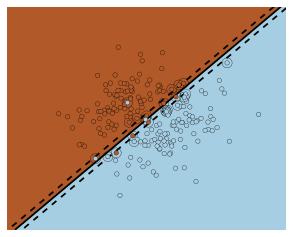

we successfully predict the 96.5 percent of data


In [74]:
# Obviousely, we cannot perfectly separate these two clusters with a line.
# let's use a soft margin classifier model over the entire data with C=1.

clf = svm.SVC(kernel='linear',C=1) #you can try other C and find that the model is not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y


###########################################################################################
plt.axis('tight')
x_min = -6
x_max = 8
y_min = -6
y_max = 8

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict the {} percent of data".format(100-abs(clf.predict(X)-Y).sum()*50/len(Y))

In [113]:
# Let's see the OS test
# As usual, let's devide our data to test data and train data.

from sklearn.cross_validation import train_test_split

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=i) #Use random_state to fix samples

    clf = svm.SVC(kernel='linear',C=1) 
    clf.fit(X_train, Y_train)

    right=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

    print "we successfully(OS) predict the {} percent of data".format((right)*100)

we successfully(OS) predict the 81.25 percent of data
we successfully(OS) predict the 84.375 percent of data
we successfully(OS) predict the 93.75 percent of data
we successfully(OS) predict the 78.125 percent of data
we successfully(OS) predict the 93.75 percent of data
we successfully(OS) predict the 93.75 percent of data
we successfully(OS) predict the 90.625 percent of data
we successfully(OS) predict the 96.875 percent of data
we successfully(OS) predict the 84.375 percent of data
we successfully(OS) predict the 93.75 percent of data


## Practice One:  

(1) Let C=np.exp(-10), run 10 times cross validation and report the average accuracy. 

(2) Optimal C tuning.

a. Try C in [np.exp(i) for i in range(-5,5,100)] to find the optimal C using training set
(You can write your own code or use the package GridSearchCV from sklearn.model_selection)

b. Test your model using the testing set(Just fix your C = optimal C you found). Try this process 10 times to show the OS accuracy. 

In [109]:
#[np.exp(i) for i in np.linspace(-5,5,100)] 

In [111]:
range(-5,5)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

In [106]:
np.linspace(-5,5,100)

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=10) #Use random_state to fix samples

clf = svm.SVC(kernel='linear',C=np.exp(-10)) 
clf.fit(X_train, Y_train)

right=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print "we successfully(OS) predict the {} percent of data".format((right)*100)

we successfully(OS) predict the 46.875 percent of data


In [116]:
from sklearn.model_selection import GridSearchCV
param_grid ={'kernel':["linear"],
            'C':[np.exp(i) for i in np.linspace(-5,5,100)]}
################################################
################################################

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=i) #Use random_state to fix samples

    rr=svm.SVC()
    gr=GridSearchCV(rr,param_grid=param_grid)
    rs=gr.fit(X_train,Y_train)
    print rs.best_estimator_

    right=1.0*(rs.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

    print "we successfully(OS) predict the {} percent of data".format((right)*100)

SVC(C=21.775992049561445, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
we successfully(OS) predict the 96.875 percent of data
SVC(C=13.141268895155582, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
we successfully(OS) predict the 90.625 percent of data
SVC(C=8.7733364384636463, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
we successfully(OS) predict the 93.75 percent of data
SVC(C=80.958719903003569, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree

#### Let's use cross-validation to pick C and see the OS result.

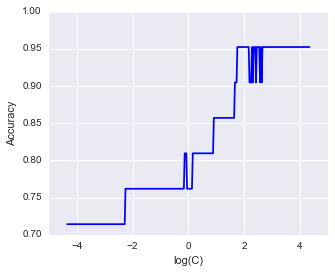

The optimal C we found is:1418.74092341 and the corresponding accuracy is:0.952380952381


In [112]:
#Let's do cross validation for choosing C since we see the result is not
#very good.
import pylab
# Let's devide the training set into training set and validation set.
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=70)
#When C is very small, which means we want to tolerate more mistakes. If C is very big, this
#means we hardly tolerate any mistakes. So, we cannot make a very big C if our data is not
#really seperable. Let's however choose from a broad range of reasonable options
C = np.linspace(-10,10,300)
C=[np.exp(i) for i in C]
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C=[math.log(y,10) for y in C] #for a better graph
pylab.plot(C,OS_validation,'b',)
pylab.legend(loc='upper right')
pylab.ylabel('Accuracy')
pylab.xlabel('log(C)')
pylab.show()

print("The optimal C we found is:{} and the corresponding accuracy is:{}".format(C_opt,temp.iloc[:,1].max())) # I choose the biggest one.


In [114]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=i) #Use random_state to fix samples

    clf = svm.SVC(kernel='linear',C=C_opt) 
    clf.fit(X_train, Y_train)

    right=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

    print "we successfully(OS) predict the {} percent of data".format((right)*100)

we successfully(OS) predict the 90.625 percent of data
we successfully(OS) predict the 90.625 percent of data
we successfully(OS) predict the 87.5 percent of data
we successfully(OS) predict the 90.625 percent of data
we successfully(OS) predict the 90.625 percent of data
we successfully(OS) predict the 90.625 percent of data
we successfully(OS) predict the 93.75 percent of data
we successfully(OS) predict the 93.75 percent of data
we successfully(OS) predict the 93.75 percent of data
we successfully(OS) predict the 93.75 percent of data


## 3. Non-linearly separable case: kernels

## Example 3. Using Kernels (Gausian)

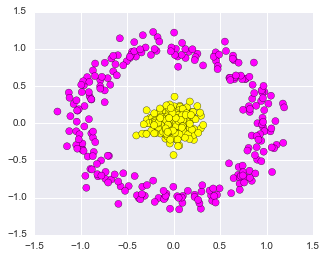

In [117]:
# Let's see this data we could use Guassian kernel SVM
from sklearn.datasets.samples_generator import make_circles
X, Y = make_circles(500, factor=.1, noise=.1,random_state=999)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

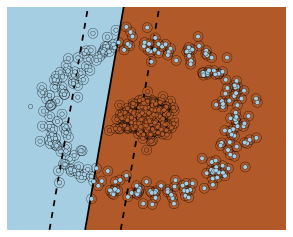

we successfully(IS) predict the 68.0 percent of data


In [118]:
# Let's have a quick look of linear SVM
clf = svm.SVC(kernel='linear',C=1) 
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -1.5
x_max = 1.5
y_min = -1.5
y_max = 1.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS mistakes: (Just use clf.predic to compare the predicted labels with current labels)
print "we successfully(IS) predict the {} percent of data".format(1.0*(clf.predict(X)==Y).sum()/len(Y)*100)

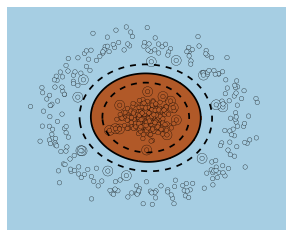

we successfully(IS) predict the 100.0 percent of data


In [119]:
#Gussian Kernal SVM
clf = svm.SVC(kernel='rbf',gamma=1) 

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y



#####################################################################################
plt.axis('tight')
x_min = -1.5
x_max = 1.5
y_min = -1.5
y_max = 1.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS mistakes: (Just use clf.predic to compare the predicted labels with current labels)
print "we successfully(IS) predict the {} percent of data".format(100.0*(clf.predict(X)==Y).sum()/len(Y))

## Example 4. Polynomial kernal example

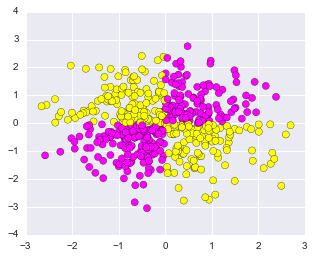

In [121]:
#generate data
np.random.seed(0)
X = np.random.randn(500, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)*1
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

In [122]:
# Obviousely, linear model won't work

# let's try a soft margin classifier model on the entire data with C=1. You can try other C as well, but the visual intuition hints that it won't help much

clf = svm.SVC(kernel='linear',C=1) 

clf.fit(X, Y)

print "we successfully predict the {} percent of data".format((clf.predict(X)==Y).sum()*100/len(Y))
print "this result means that we cannot get any useful information. So we should consider non-linear ones"

we successfully predict the 52 percent of data
this result means that we cannot get any useful information. So we should consider non-linear ones


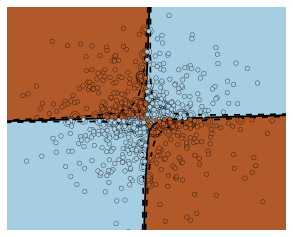

we successfully predict(IS) the 95 percent of data


In [123]:
# Now let's use polynomial kernal with degree 2 
clf = svm.SVC(kernel='poly',degree=2) 
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)


################################################################################
plt.axis('tight')
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()
print "we successfully predict(IS) the {} percent of data".format((Y==clf.predict(X)).sum()*100/len(Y))

In [126]:
#OS test
# As usual, let's divide our data to test data and train data.
from sklearn.cross_validation import train_test_split
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=i) #Use random_state to fix samples

    clf = svm.SVC(kernel='poly',degree=2) 
    clf.fit(X_train, Y_train)

    correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)

    print "we successfully(OS) predict the {} percent of data".format((correct)*100)


we successfully(OS) predict the 99.3939393939 percent of data
we successfully(OS) predict the 97.5757575758 percent of data
we successfully(OS) predict the 92.7272727273 percent of data
we successfully(OS) predict the 95.1515151515 percent of data
we successfully(OS) predict the 95.1515151515 percent of data
we successfully(OS) predict the 92.7272727273 percent of data
we successfully(OS) predict the 91.5151515152 percent of data
we successfully(OS) predict the 95.1515151515 percent of data
we successfully(OS) predict the 96.9696969697 percent of data
we successfully(OS) predict the 93.3333333333 percent of data


## Classification of individual/commercial houses

In [127]:
data = pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/lecture//NYC_RE_sample.csv")
# split sample into training and test ones
data.columns=['index','area','land','year','price','bldtype']
data.bldtype=data.bldtype-1
X=data.iloc[:,1:5]
Y=data.iloc[:,5]
data.head()

,index,area,land,year,price,bldtype
0,1,2607,1200,2010,825000.0,0
1,2,1950,1783,1899,1685000.0,0
2,3,2520,1875,1899,1100000.0,0
3,4,3750,3125,1931,1200000.0,1
4,5,7812,5021,1908,1900000.0,1


In [128]:
from sklearn import preprocessing # data standardization highly recommended
X_scaled = preprocessing.scale(X)
X=X_scaled

In [129]:
pd.DataFrame(X_scaled).head()

,0,1,2,3
0,-0.284829,-0.452581,2.232000,-1.171637
1,-0.316094,-0.361470,-0.461891,-0.664654
2,-0.288970,-0.347092,-0.461891,-1.009520
3,-0.230438,-0.151743,0.314726,-0.950568
4,-0.037140,0.144564,-0.243467,-0.537908


In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=90) #Use random_state to fix samples

#### (A) Let's have a look linear model with soft margin.

In [134]:
#Now let's compare the result of three models
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#(1) Let's have a look linear model with a default C=1.
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by {}".format((correct)*100,'linear')

we successfully(OS) predict the 78.125 percent of data by linear


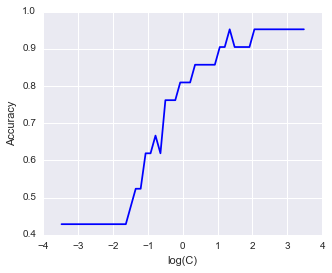

The optimal C we found is:582.51034141 w.r.t. max accuracy :0.952380952381


In [135]:
# Let's do cross validation for choosing C since we see the result is not really good.
import pylab
# Let's devide the training set into training set and validation set.
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=2999)
#When C is very small, which means we want to tolerate more mistakes. If C is very big, which 
#means we do not tolerate much mistakes - getting rid of any single mistake then is worth more than making the margin high
C = [np.exp(i) for i in np.linspace(-8,8,50)] 
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) #OS score for validation set
    OS_validation.append(right)
    
temp=pd.DataFrame([C,OS_validation]).T #put results together.
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # I take the middle point for points w.r.t. max accuracy
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C=[math.log(y,10) for y in C]# for a better graph

pylab.plot(C,OS_validation,'b',)
pylab.legend(loc='upper right')
pylab.ylabel('Accuracy')
pylab.xlabel('log(C)')
pylab.show()

print("The optimal C we found is:{} w.r.t. max accuracy :{}".format(C_opt,temp.iloc[:,1].max())) # we choose the biggest one to stay on the safe side


#### we choose C=C_opt and let's see the OS test.

In [137]:
clf = svm.SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by using linear kernel".format((correct)*100)

we successfully(OS) predict the 90.625 percent of data by using linear kernel


## Practice Two: Polynomial kernel

1. Use the default hyper-parameters(C=1, Poly=3) to train the model using training data. Please report the OS accuracy on your testing data.

2. Please use the training set to pick the optimal model from the following combinations of options: 

degree in range(1,7)

C in 10**np.linspace(-5,10,20)

coef0 in 10**np.linspace(-3,3,20)

max_iter=100

What is the OS Accuracy?

#### Please use GridSearchCV now.

In [139]:
#Polynomial kernel. (Default C=1,Poly=3)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by poly".format((correct)*100)

we successfully(OS) predict the 68.75 percent of data by poly


In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
max_iter=100
dd=range(1,7)
C=10**np.linspace(-5,10,20)
coef0=10**np.linspace(-3,3,20)

In [145]:
from sklearn.model_selection import GridSearchCV
param_grid ={'kernel':["poly"],
            'C':C,
            'coef0':coef0,
            'degree':dd,
            'max_iter':[100]}
################################################
################################################

rr=svm.SVC()
gr=GridSearchCV(rr,param_grid=param_grid)
rs=gr.fit(X_train,Y_train)

C:\Users\lingjing\Anaconda2\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [147]:
print 1.0*(rs.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

0.96875


## Practice Three. Repeat the practice 2 using Guassian Kernel. 

Please feel free to check any possible hyperparameters' combinations you would like but only use the training data. (You need to check C and gamma at least. But other hyperparameters related to training process you could also change as well)

#### Competetion~
Then please report your OS accuracy on the given testing data and let's see who get the best result. (It could depends on luck, since it is only one special split.)

#### Why don't try your own kernel?  It is very convenient to customize your kernel in sklearn. 

SVM with custom kernel:
http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py